### Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv("spotify-2023.csv", encoding='ISO-8859-1')

# Analysing the data.

In [3]:
dataset.head(5)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [4]:
dataset.shape

(953, 24)

In [5]:
dataset.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [6]:
dataset.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [7]:
dataset.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

We can see from the data.head that stream has a numerical value.

But on finding with dtypes its shows 'object' means there is some error in that column.

In [8]:
dataset['streams'].unique()

array(['141381703', '133716286', '140003974', '800840817', '303236322',
       '183706234', '725980112', '58149378', '95217315', '553634067',
       '505671438', '58255150', '1316855716', '387570742', '2513188493',
       '1163093654', '496795686', '30546883', '335222234', '363369738',
       '86444842', '52135248', '1297026226', '200647221', '115364561',
       '78300654', '899183384', '61245289', '429829812', '127408954',
       '22581161', '52294266', '843957510', '999748277', '618990393',
       '123122413', '188933502', '1355959075', '786181836', '176553476',
       '354495408', '2808096550', '1109433169', '1047101291', '65156199',
       '570515054', '1085685420', '1647990401', '2565529693', '518745108',
       '107753850', '177740666', '153372011', '57876440', '1813673666',
       '3703895074', '256483385', '1214083358', '16011326', '812019557',
       '111947664', '156338624', '720434240', '357925728', '674072710',
       '1755214421', '404562836', '373199958', '14780425', '395

'BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3'

So this is the error in data

In [9]:
# checking the line where we have this error
dataset[dataset['streams'] == 'BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3']

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
574,Love Grows (Where My Rosemary Goes),Edison Lighthouse,1,1970,1,1,2877,0,BPM110KeyAModeMajorDanceability53Valence75Ener...,16,...,110,A,Major,53,75,69,7,0,17,3


In [10]:
dataset = dataset.drop(574)

In [11]:
count = (dataset == 'BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3').sum().sum()
count

np.int64(0)

In [12]:
dataset.head(5)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [13]:
dataset.shape

(952, 24)

In [14]:
dataset['streams'] = dataset['streams'].astype(int)

In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 952 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            952 non-null    object
 1   artist(s)_name        952 non-null    object
 2   artist_count          952 non-null    int64 
 3   released_year         952 non-null    int64 
 4   released_month        952 non-null    int64 
 5   released_day          952 non-null    int64 
 6   in_spotify_playlists  952 non-null    int64 
 7   in_spotify_charts     952 non-null    int64 
 8   streams               952 non-null    int64 
 9   in_apple_playlists    952 non-null    int64 
 10  in_apple_charts       952 non-null    int64 
 11  in_deezer_playlists   952 non-null    object
 12  in_deezer_charts      952 non-null    int64 
 13  in_shazam_charts      902 non-null    object
 14  bpm                   952 non-null    int64 
 15  key                   857 non-null    object


In [16]:
dataset['in_deezer_playlists'].unique()

array(['45', '58', '91', '125', '87', '88', '43', '30', '48', '66', '54',
       '21', '745', '182', '863', '161', '78', '95', '23', '10', '42',
       '582', '32', '318', '41', '15', '143', '50', '13', '245', '165',
       '184', '34', '24', '410', '151', '6', '843', '537', '247', '65',
       '138', '458', '2,445', '74', '57', '213', '109', '3,394', '3,421',
       '39', '142', '73', '102', '4', '89', '4,053', '169', '31', '8',
       '707', '1,056', '164', '4,095', '68', '331', '80', '18', '1,003',
       '71', '25', '5', '798', '110', '1,800', '141', '2,703', '35', '29',
       '0', '69', '63', '1,632', '163', '19', '59', '2,394', '1,034',
       '327', '2,163', '695', '2,655', '476', '145', '47', '61', '246',
       '38', '52', '6,551', '1,212', '1,078', '7', '282', '254', '588',
       '1', '2,094', '2,969', '26', '3,889', '99', '5,239', '44', '3',
       '974', '356', '12', '453', '3,631', '113', '112', '435', '929',
       '939', '4,607', '806', '885', '28', '2,733', '3,425', '

Here, in "in_deezer_playlists" the problem is that they used the comma in that So instead of Int64 it converted to object.

In [17]:
dataset['in_deezer_playlists'] = pd.to_numeric(dataset['in_deezer_playlists'], errors='coerce').astype('Int64')
dataset['in_shazam_charts'] = pd.to_numeric(dataset['in_shazam_charts'], errors='coerce').astype('Int64')

In [18]:
dataset.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                  int64
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists      Int64
in_deezer_charts         int64
in_shazam_charts         Int64
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

In [19]:
dataset.describe().round(2)

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,952.00,952.00,952.00,952.00,952.00,952.00,9.520000e+02,952.00,952.00,873.0,952.00,895.0,952.00,952.00,952.00,952.00,952.00,952.00,952.00,952.00
mean,1.56,2018.29,6.04,13.94,5202.57,12.02,5.141374e+08,67.87,51.96,109.8,2.67,51.23,122.55,66.98,51.41,64.27,27.08,1.58,18.21,10.14
std,0.89,11.01,3.56,9.20,7901.40,19.58,5.668569e+08,86.47,50.63,178.9,6.04,126.55,28.07,14.63,23.48,16.56,26.00,8.41,13.72,9.92
min,1.00,1930.00,1.00,1.00,31.00,0.00,2.762000e+03,0.00,0.00,0.0,0.00,0.0,65.00,23.00,4.00,9.00,0.00,0.00,3.00,2.00
25%,1.00,2020.00,3.00,6.00,874.50,0.00,1.416362e+08,13.00,7.00,12.0,0.00,0.0,99.75,57.00,32.00,53.00,6.00,0.00,10.00,4.00
50%,1.00,2022.00,6.00,13.00,2216.50,3.00,2.905309e+08,34.00,38.50,36.0,0.00,2.0,121.00,69.00,51.00,66.00,18.00,0.00,12.00,6.00
75%,2.00,2022.00,9.00,22.00,5573.75,16.00,6.738690e+08,88.00,87.00,110.0,2.00,36.0,140.25,78.00,70.00,77.00,43.00,0.00,24.00,11.00
max,8.00,2023.00,12.00,31.00,52898.00,147.00,3.703895e+09,672.00,275.00,974.0,58.00,953.0,206.00,96.00,97.00,97.00,97.00,91.00,97.00,64.00


We can already get some information from the table, for example:
- We have songs from 1930 to 2023;
- There is at least one song included in 52898 playlists;
- The most played song has been played 3.703895e+09 times on spotify,

In [20]:
dataset.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists     79
in_deezer_charts         0
in_shazam_charts        57
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

We have two columns with null values:

in_shazam_charts - which represents the song's position in the Shazam rankings

key - which represents the pitch of the music <br><br>

Replacing them with NA value


In [21]:
# replacing null values with 'NA'
dataset['key'] = dataset['key'].fillna('NA')
dataset['in_shazam_charts'] = dataset['in_shazam_charts'].fillna(0)

In [22]:
# checking the number of nulls
dataset.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists     79
in_deezer_charts         0
in_shazam_charts         0
bpm                      0
key                      0
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [23]:
def plot_features(dataset):
   #(boxplot, histogram+kde, violin, kde plot)
    numeric_columns = dataset.select_dtypes(include=['float64', 'int64']).columns
    fig, axes = plt.subplots(nrows=len(numeric_columns), ncols=4, figsize=(20, len(numeric_columns) * 3))
    
    for i, feature in enumerate(numeric_columns):
        # Boxplot
        sns.boxplot(data=dataset, x=feature, ax=axes[i,0], color='#4a90e2')
        axes[i,0].set_title(f'Boxplot of {feature}', fontsize=14, fontweight='semibold')
        axes[i,0].set_xlabel('')
        axes[i,0].set_ylabel('')

        # Histogram with KDE
        sns.histplot(data=dataset, x=feature, ax=axes[i,1], kde=True, color='#7b68ee')
        axes[i,1].set_title(f'Histogram & KDE', fontsize=14, fontweight='semibold')
        axes[i,1].set_xlabel('')
        axes[i,1].set_ylabel('')

        # Violin plot
        sns.violinplot(data=dataset, x=feature, ax=axes[i,2], color='#50c878')
        axes[i,2].set_title(f'Violin plot', fontsize=14, fontweight='semibold')
        axes[i,2].set_xlabel('')
        axes[i,2].set_ylabel('')

        # KDE plot only
        sns.kdeplot(data=dataset, x=feature, ax=axes[i,3], fill=True, color='#e07a5f')
        axes[i,3].set_title(f'KDE plot', fontsize=14, fontweight='semibold')
        axes[i,3].set_xlabel('')
        axes[i,3].set_ylabel('')
        
    fig.suptitle("Descriptive analysis - Boxplots", fontsize=20, fontweight='bold', y=1.00)
    plt.tight_layout(pad=4.0)
    sns.set_style("whitegrid")
    plt.show()

We can see several insights when we plot the boxplots:
- Most songs have up to 3 artists, but there are some songs with up to 8 artists;
- Most of the songs were released between 2018 and 2022, but there are several songs that were released before that, even before 1940;
- Most of the songs are present in up to 12,000 playlists, but there are songs that are present in more than 50,000 playlists;
- Most songs have been played a few hundred million times, but some songs have been played more than 2 billion times.

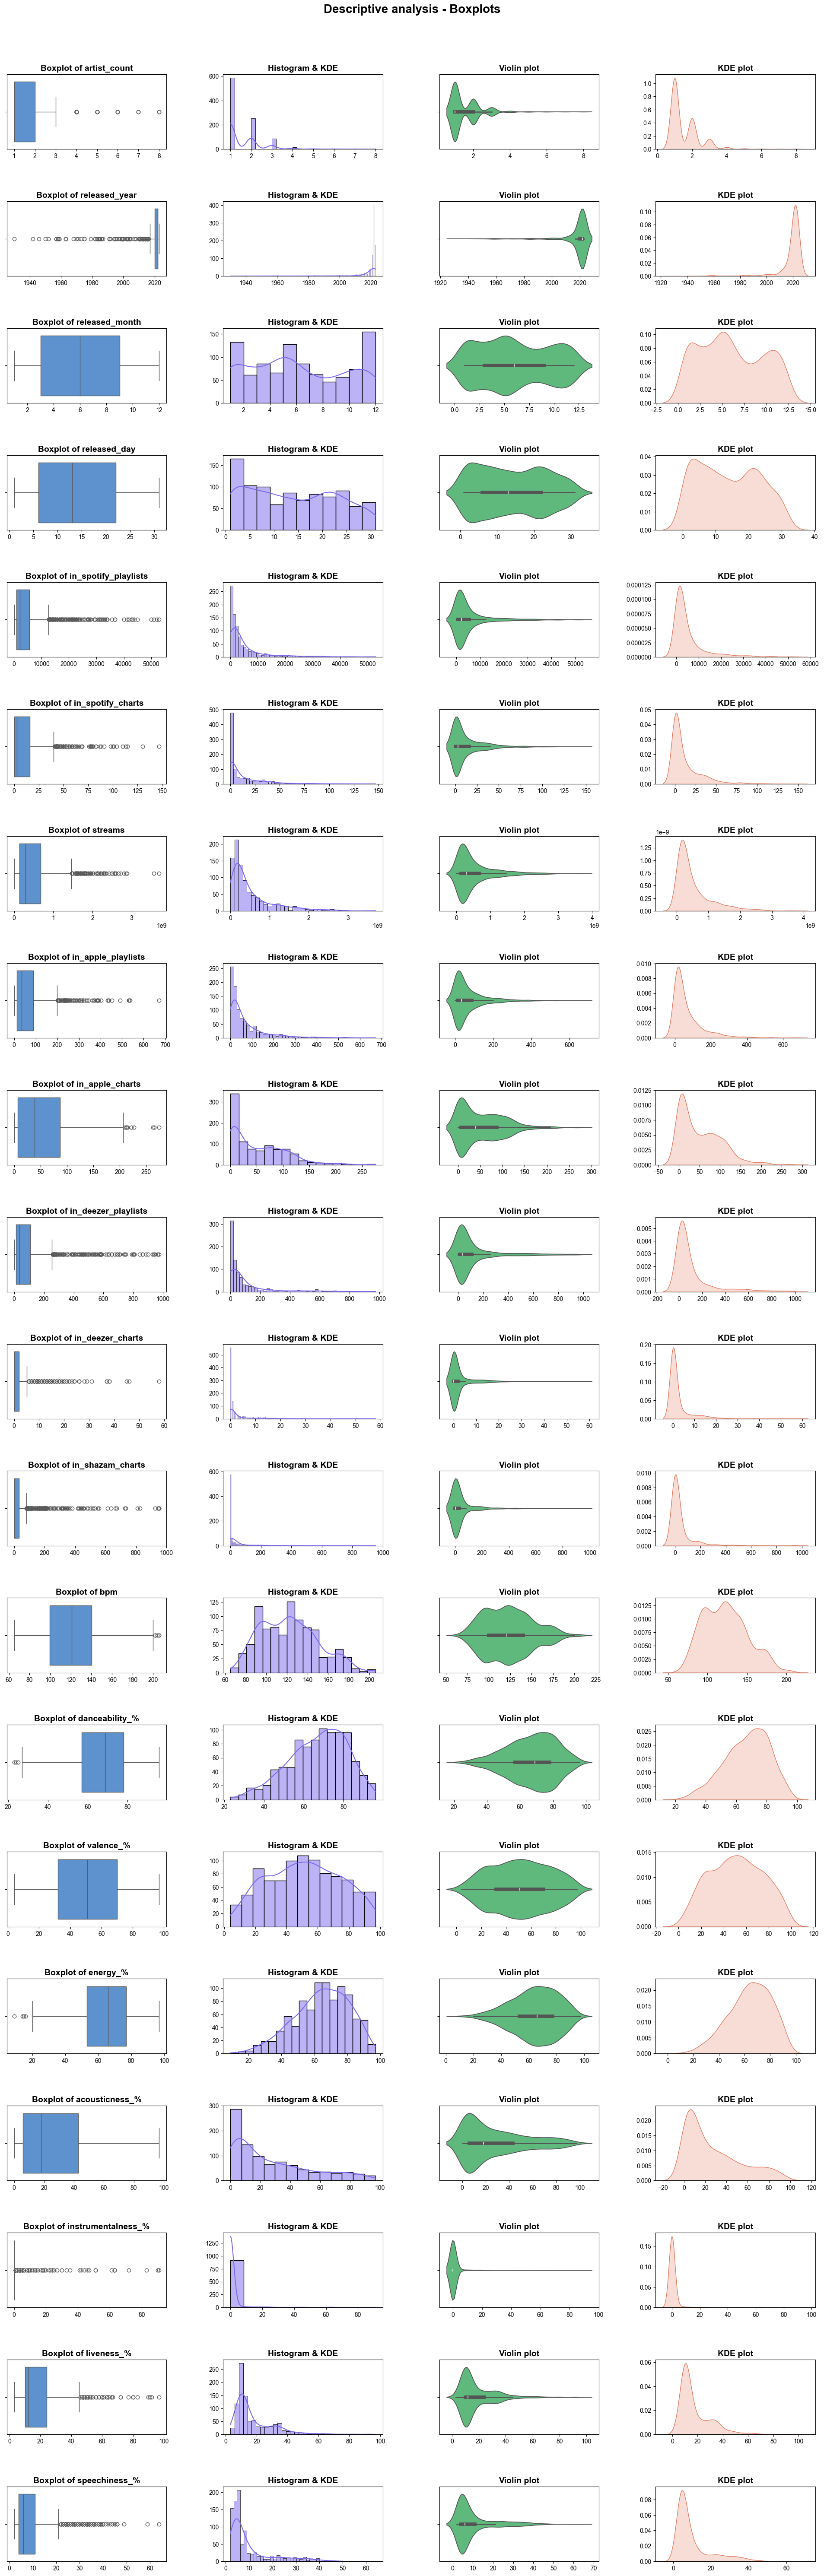

In [24]:
plot_features(dataset)

In [25]:
# selecting the 10 most listened to songs
top_10_songs = dataset.sort_values(by='streams', ascending=False).reset_index(drop=True).head(10)
top_10_songs

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3703895074,672,...,171,C#,Major,50,38,80,0,0,9,7
1,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,3562543890,33,...,96,C#,Minor,83,93,65,58,0,9,8
2,Someone You Loved,Lewis Capaldi,1,2018,11,8,17836,53,2887241814,440,...,110,C#,Major,50,45,41,75,0,11,3
3,Dance Monkey,Tones and I,1,2019,5,10,24529,0,2864791672,533,...,98,F#,Minor,82,54,59,69,0,18,10
4,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,2808096550,372,...,90,D,Major,76,91,50,54,0,7,5
5,One Dance,"Drake, WizKid, Kyla",3,2016,4,4,43257,24,2713922350,433,...,104,C#,Major,77,36,63,1,0,36,5
6,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",2,2021,7,9,17050,36,2665343922,492,...,170,C#,Major,59,48,76,4,0,10,5
7,Believer,Imagine Dragons,1,2017,1,31,18986,23,2594040133,250,...,125,A#,Minor,77,74,78,4,0,23,11
8,Closer,"The Chainsmokers, Halsey",2,2016,5,31,28032,0,2591224264,315,...,95,G#,Major,75,64,52,41,0,11,3
9,Starboy,"The Weeknd, Daft Punk",2,2016,9,21,29536,79,2565529693,281,...,186,G,Major,68,49,59,16,0,13,28


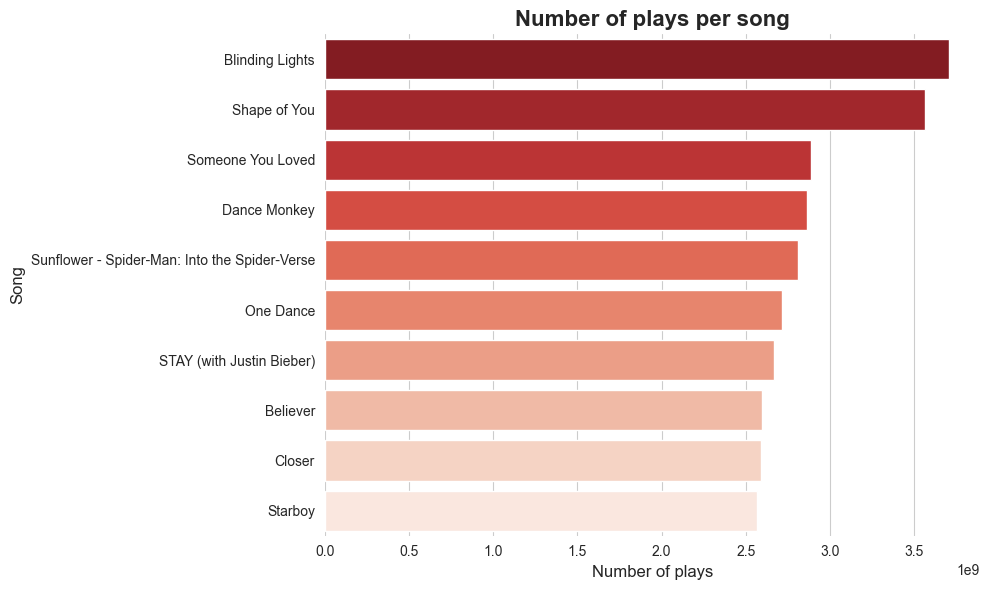

In [26]:
# plotting a bar graph of the top 10 most listened to songs
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_songs, x='streams', y='track_name', palette='Reds_r')

plt.xticks(rotation=0)
plt.title('Number of plays per song', fontsize=16, fontweight='bold', y=1.00)
plt.xlabel('Number of plays',fontsize=12)
plt.ylabel('Song', fontsize=12)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

It can be seen that the most listened to song is 'Blinding Lights'.

In [27]:
# selecting the 10 most listened to artists
top_10_artists = dataset.groupby('artist(s)_name', as_index=False)['streams'].sum().sort_values(by= 'streams', ascending=False).head(10)
top_10_artists

,artist(s)_name,streams
571,The Weeknd,14185552870
557,Taylor Swift,14053658300
159,Ed Sheeran,13908947204
222,Harry Styles,11608645649
43,Bad Bunny,9997799607
430,Olivia Rodrigo,7442148916
170,Eminem,6183805596
75,Bruno Mars,5846920599
25,Arctic Monkeys,5569806731
228,Imagine Dragons,5272484650


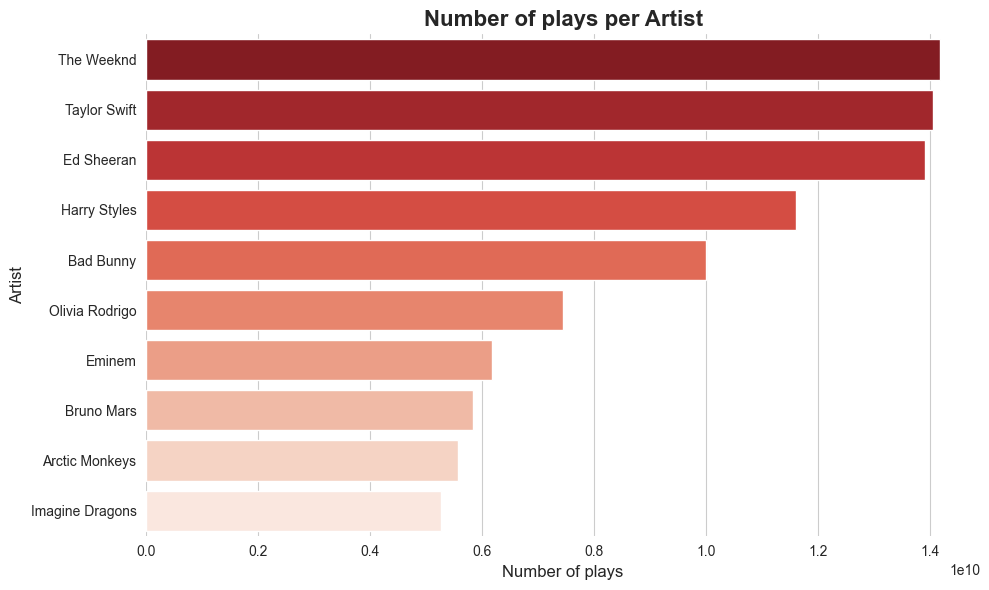

In [28]:
# plotting a bar chart of the top 10 most listened to artists
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_artists, x='streams', y='artist(s)_name', palette='Reds_r')

plt.xticks(rotation=0)
plt.title('Number of plays per Artist', fontsize=16, fontweight='bold', y=1.00)
plt.xlabel('Number of plays',fontsize=12)
plt.ylabel('Artist', fontsize=12)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

You can see that The Weeknd is the most listened to artist, followed by Taylor Swift and Ed Sheeran.

In [29]:
# The top 10 songs on spotify playlists.
top_10_playlist = dataset.sort_values(by='in_spotify_playlists', ascending=False).reset_index(drop=True).head(10)
top_10_playlist

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Get Lucky - Radio Edit,"Pharrell Williams, Nile Rodgers, Daft Punk",3,2013,1,1,52898,0,933815613,203,...,116,F#,Minor,79,87,81,4,0,10,4
1,Mr. Brightside,The Killers,1,2003,9,23,51979,15,1806617704,306,...,148,C#,Major,35,24,93,0,0,10,8
2,Wake Me Up - Radio Edit,Avicii,1,2013,1,1,50887,34,1970673297,315,...,124,D,Major,53,66,78,0,0,16,5
3,Smells Like Teen Spirit - Remastered 2021,Nirvana,1,1991,9,10,49991,9,1690192927,265,...,117,C#,Major,52,73,91,0,0,11,7
4,Take On Me,a-ha,1,1984,10,19,44927,17,1479115056,34,...,84,F#,Minor,57,86,90,2,0,9,5
5,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3703895074,672,...,171,C#,Major,50,38,80,0,0,9,7
6,One Dance,"Drake, WizKid, Kyla",3,2016,4,4,43257,24,2713922350,433,...,104,C#,Major,77,36,63,1,0,36,5
7,Somebody That I Used To Know,"Gotye, Kimbra",2,2011,1,1,42798,0,1457139296,217,...,129,NA,Major,86,75,52,54,0,10,4
8,Everybody Wants To Rule The World,Tears For Fears,1,1985,2,17,41751,25,1205951614,101,...,112,G,Major,64,54,81,36,0,11,6
9,Sweet Child O' Mine,Guns N' Roses,1,1987,1,1,41231,1,1553497987,228,...,125,F#,Major,45,67,90,9,11,10,5


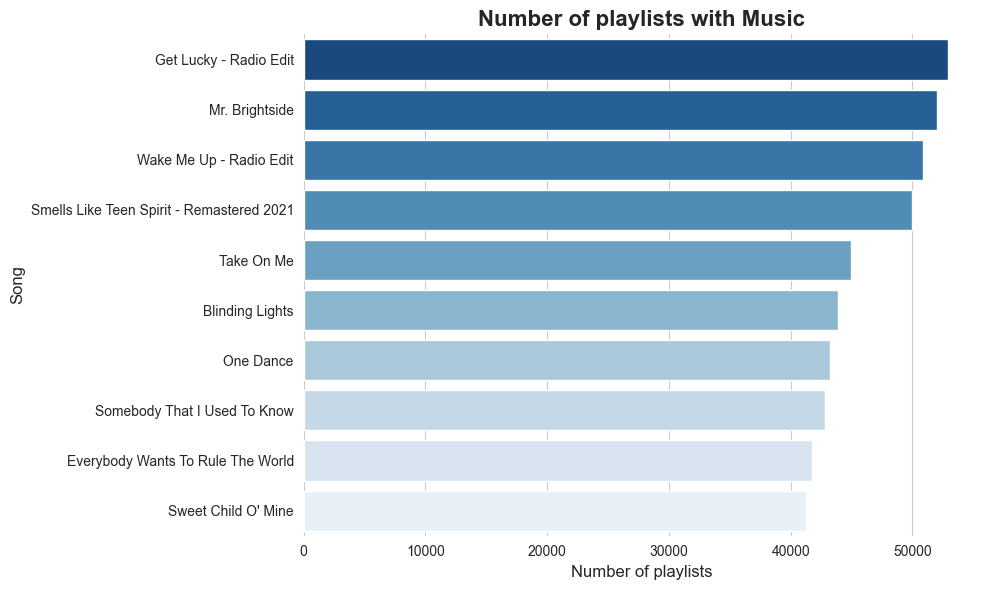

In [30]:
# plotting a graph with the top 10 songs in spotify playlists
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_playlist, x='in_spotify_playlists', y='track_name', palette='Blues_r')

plt.xticks(rotation=0)
plt.title('Number of playlists with Music', fontsize=16, fontweight='bold', y=1.00)
plt.xlabel('Number of playlists',fontsize=12)
plt.ylabel('Song', fontsize=12)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

Although we have songs that appear in more than 50,000 playlists, these songs do not appear in the top 10 most listened to, which may indicate that the number of plays of each song is independent of how many playlists it appears in.

In [31]:
# Get top 10 artists by total stream count
top_10_artists = dataset.groupby('artist(s)_name', as_index=False)['streams'].sum().sort_values(by='streams', ascending=False).head(10)

# Get the most streamed song for each of those artists
top_songs = dataset.sort_values(by='streams', ascending=False).drop_duplicates('artist(s)_name')[['artist(s)_name', 'track_name']]

# Merge top artist stream totals with their top song
top_10_artists_with_song = pd.merge(top_10_artists, top_songs, on='artist(s)_name')

# Rename columns for clarity
top_10_artists_with_song.rename(columns={
    'artist(s)_name': 'Artist',
    'streams': 'Total Streams',
    'track_name': 'Top Song'
}, inplace=True)
top_10_artists_with_song

,Artist,Total Streams,Top Song
0,The Weeknd,14185552870,Blinding Lights
1,Taylor Swift,14053658300,Blank Space
2,Ed Sheeran,13908947204,Shape of You
3,Harry Styles,11608645649,As It Was
4,Bad Bunny,9997799607,Titi Me Preguntï¿
5,Olivia Rodrigo,7442148916,good 4 u
6,Eminem,6183805596,Lose Yourself - Soundtrack Version
7,Bruno Mars,5846920599,When I Was Your Man
8,Arctic Monkeys,5569806731,Do I Wanna Know?
9,Imagine Dragons,5272484650,Believer


**As here we can see that there is no significant realtion between top artist and top songs.**

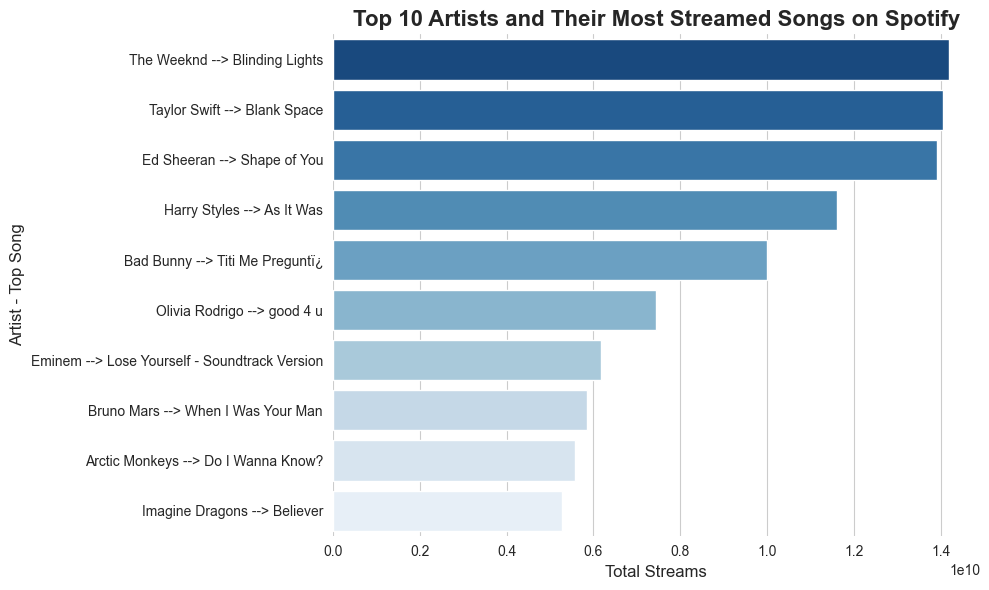

In [32]:
# plotting a graph with the top 10 songs in spotify playlists
def plot_bargraph (data):
    data['Label'] = data['Artist'] + " --> " + data['Top Song']
    plt.figure(figsize=(10, 6))
    sns.barplot(data=data, x='Total Streams', y='Label', palette='Blues_r')
    
    plt.xticks(rotation=0)
    plt.title('Top 10 Artists and Their Most Streamed Songs on Spotify', fontsize=16, fontweight='bold')
    plt.xlabel('Total Streams', fontsize=12)
    plt.ylabel('Artist - Top Song', fontsize=12)
    sns.despine(left=True, bottom=True)
    plt.tight_layout()
    plt.show()
plot_bargraph(top_10_artists_with_song)

## **Conclusion**
<br>

Top 10 artists and songs

|    | Top 10 artists                   | Top 10 Songs          |
| -- | ---------------------------- | ----------------------------------------------|
| 1  | The Weeknd                   | Blinding Lights                               |
| 2  | Taylor swift                 | Shape of You                                  |
| 3  | Ed Sheeran                   | Someone You Loved                             |
| 4  | Harry Styles                 | Dance Monkey                                  |
| 5  | Bad Bunny                    | Sunflower - Spider-Man: Into the Spider-Verse |
| 6  | Olivia Rodrigo               | One Dance                                     |
| 7  | Eminem                       | STAY (with Justin Bieber)                     |
| 8  | Bruno Mars                   | Believer                                      |  
| 9  | Arctic Monkeys               | Closer                                        |
| 10 |  Imagine Dragons             | Starboy                                       |

<br><br>